# **Clustering based Course Recommender System**


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# also set a random state
rs = 123

### Load the user profile dataset


Let's first load the original user profile feature vectors:


In [3]:
# Importing the pandas library, which is commonly used for data manipulation and analysis
import pandas as pd

# Defining the URL of the CSV file containing user profiles
user_profile_url = "data/user_profile.csv"

# Using pandas' read_csv function to read the CSV file from the specified URL into a DataFrame
user_profile_df = pd.read_csv(user_profile_url)

# Displaying the first few rows of the DataFrame to inspect its contents
user_profile_df.head()


,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [4]:
user_profile_df.shape

(33901, 15)

we can then list the feature names, they are the user interested topics (course genres):


In [5]:
feature_names = list(user_profile_df.columns[1:])
feature_names

['Database',
 'Python',
 'CloudComputing',
 'DataAnalysis',
 'Containers',
 'MachineLearning',
 'ComputerVision',
 'DataScience',
 'BigData',
 'Chatbot',
 'R',
 'BackendDev',
 'FrontendDev',
 'Blockchain']

As we can see from the user profile dataset, we have about 33K unique users with interests in areas like ``Database``, ``Python``, ``CloudComputing``, etc. Then, let's check the  summary statistics for each feature.


In [6]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000,33901.000000
mean,1.064064e+06,5.518569,3.493791,2.307100,3.624701,0.998938,3.048022,0.001770,5.087343,4.750450,0.462995,1.017433,2.269461,0.315802,0.986844
std,4.972578e+05,7.611941,4.227254,3.841858,4.760135,2.351764,4.624004,0.072846,5.230697,7.216228,1.055186,2.342532,4.310752,1.363462,1.950585
min,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.813480e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.043907e+06,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.451159e+06,9.000000,6.000000,3.000000,6.000000,0.000000,3.000000,0.000000,9.000000,6.000000,0.000000,0.000000,3.000000,0.000000,2.000000
max,2.103039e+06,63.000000,18.000000,38.000000,48.000000,15.000000,39.000000,3.000000,32.000000,54.000000,6.000000,18.000000,54.000000,15.000000,12.000000


The original user profile feature vector is not normalized, which may cause issues when we perform clustering and Principal component analysis (PCA), therefor we standardize the data.


In [7]:
# Use StandardScaler to make each feature with mean 0, standard deviation 1
# Instantiating a StandardScaler object
scaler = StandardScaler()

# Standardizing the selected features (feature_names) in the user_profile_df DataFrame
user_profile_df[feature_names] = scaler.fit_transform(user_profile_df[feature_names])

# Printing the mean and standard deviation of the standardized features
print("mean {} and standard deviation{} ".format(user_profile_df[feature_names].mean(), user_profile_df[feature_names].std()))

mean Database          -3.353495e-17
Python            -5.700942e-17
CloudComputing    -3.521170e-17
DataAnalysis      -7.671120e-17
Containers         3.353495e-18
MachineLearning    3.688845e-17
ComputerVision    -1.509073e-17
DataScience       -1.676748e-17
BigData            6.706990e-17
Chatbot           -6.874665e-17
R                  4.233788e-17
BackendDev         1.383317e-17
FrontendDev        5.051202e-17
Blockchain        -5.281755e-17
dtype: float64 and standard deviationDatabase           1.000015
Python             1.000015
CloudComputing     1.000015
DataAnalysis       1.000015
Containers         1.000015
MachineLearning    1.000015
ComputerVision     1.000015
DataScience        1.000015
BigData            1.000015
Chatbot            1.000015
R                  1.000015
BackendDev         1.000015
FrontendDev        1.000015
Blockchain         1.000015
dtype: float64 


In [8]:
user_profile_df.describe()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
count,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04,3.390100e+04
mean,1.064064e+06,-3.353495e-17,-5.700942e-17,-3.521170e-17,-7.671120e-17,3.353495e-18,3.688845e-17,-1.509073e-17,-1.676748e-17,6.706990e-17,-6.874665e-17,4.233788e-17,1.383317e-17,5.051202e-17,-5.281755e-17
std,4.972578e+05,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,2.000000e+00,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
25%,6.813480e+05,-7.249991e-01,-8.265040e-01,-6.005256e-01,-7.614816e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-9.726080e-01,-6.583107e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
50%,1.043907e+06,-3.308757e-01,-1.168130e-01,-6.005256e-01,-1.312380e-01,-4.247674e-01,-6.591835e-01,-2.429612e-02,-3.990622e-01,-3.811535e-01,-4.387873e-01,-4.343370e-01,-5.264730e-01,-2.316212e-01,-5.059295e-01
75%,1.451159e+06,4.573712e-01,5.928781e-01,1.803581e-01,4.990056e-01,-4.247674e-01,-1.038556e-02,-2.429612e-02,7.480294e-01,1.731609e-01,-4.387873e-01,-4.343370e-01,1.694715e-01,-2.316212e-01,5.194189e-01
max,2.103039e+06,7.551593e+00,3.431642e+00,9.290667e+00,9.322416e+00,5.953517e+00,7.775190e+00,4.115884e+01,5.145214e+00,6.824934e+00,5.247500e+00,7.249771e+00,1.200053e+01,1.076995e+01,5.646161e+00


The normalized user profile features are: 


In [9]:
features = user_profile_df.loc[:, user_profile_df.columns != 'user']
features

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,6.106474,2.485388,0.961242,8.272010,0.850889,6.477594,-0.024296,4.571668,5.023412,1.456642,7.249771,7.360899,6.369323,2.570116
1,4.529980,-0.353377,0.440653,5.120792,-0.424767,2.368540,-0.024296,2.851031,2.667576,-0.438787,2.127032,0.865416,-0.231621,0.519419
2,2.427988,1.066006,4.084776,4.280467,-0.424767,5.828796,-0.024296,3.233395,1.281790,1.456642,5.542191,5.505047,2.702132,2.570116
3,-0.462250,-0.826504,-0.600526,-0.341319,-0.424767,-0.659184,-0.024296,-0.972608,-0.381153,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
4,0.063248,-0.826504,-0.600526,0.078843,-0.424767,-0.659184,-0.024296,-0.972608,0.173161,-0.438787,0.419453,-0.526473,-0.231621,-0.505930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,-0.330876,-0.116813,0.180358,0.499006,-0.424767,-0.659184,-0.024296,0.174484,-0.658311,-0.438787,2.127032,0.865416,-0.231621,1.032093
33897,-0.724999,-0.826504,-0.079936,-0.761482,-0.424767,-0.659184,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930
33898,-0.330876,0.592878,0.961242,-0.761482,-0.424767,2.368540,-0.024296,0.748029,-0.658311,-0.438787,0.846348,-0.526473,-0.231621,-0.505930
33899,-0.724999,-0.826504,-0.600526,-0.761482,-0.424767,-0.226652,-0.024296,-0.972608,-0.658311,-0.438787,-0.434337,-0.526473,-0.231621,-0.505930


we can also save the user ids for later recommendation tasks:


In [10]:
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']
user_ids

,user
0,2
1,4
2,5
3,7
4,8
...,...
33896,2102054
33897,2102356
33898,2102680
33899,2102983


### Performing K-means clustering algorithm on the user profile feature vectors


In [11]:
# WRITE YOUR CODE HERE

# Find an optimized number of neighors k from a candidate list such as list_k = list(range(1, 30))
sum_of_squares = []
n_clusters = list(range(2, 30))
for k in n_clusters:   
    model = KMeans(n_clusters=k, random_state=rs).fit(features)
    sum_of_squares.append(model.inertia_)

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python31

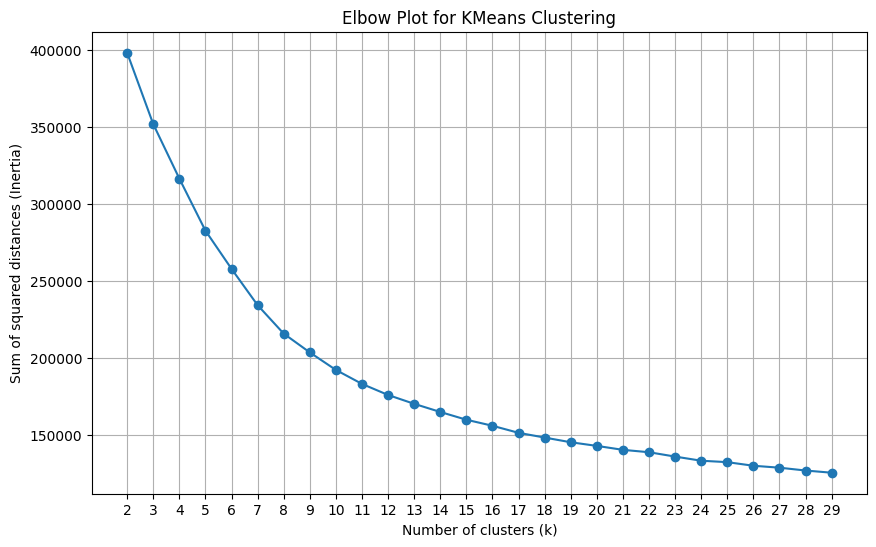

In [12]:

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, sum_of_squares, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(n_clusters)
plt.grid(True)
plt.show()

In [13]:
cluster_labels = [None] * len(user_ids)

In [14]:
model = KMeans(n_clusters=14, random_state=rs).fit(features)
cluster_labels = model.labels_ 

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
def combine_cluster_labels(user_ids, labels):
    # Convert labels to a DataFrame
    labels_df = pd.DataFrame(labels)    
    # Merge user_ids DataFrame with labels DataFrame based on index
    cluster_df = pd.merge(user_ids, labels_df, left_index=True, right_index=True)
    # Rename columns to 'user' and 'cluster'
    cluster_df.columns = ['user', 'cluster']
    return cluster_df

In [16]:
cluster_df = combine_cluster_labels(user_ids, cluster_labels)
cluster_df.head()

,user,cluster
0,2,6
1,4,13
2,5,6
3,7,2
4,8,2


### Applying PCA on user profile feature vectors to reduce dimensions


In [17]:
# Extracting features from the user_profile_df DataFrame, excluding the 'user' column
features = user_profile_df.loc[:, user_profile_df.columns != 'user']

# Extracting user IDs from the user_profile_df DataFrame
user_ids = user_profile_df.loc[:, user_profile_df.columns == 'user']

# Creating a list of feature names by excluding the 'user' column name
feature_names = list(user_profile_df.columns[1:])

In [18]:
print(f"There are {len(feature_names)} features for each user profile.")

There are 14 features for each user profile.


If we plot a covariance matrix of the user profile feature vectors with 14 features, we can observe that some features are actually correlated:


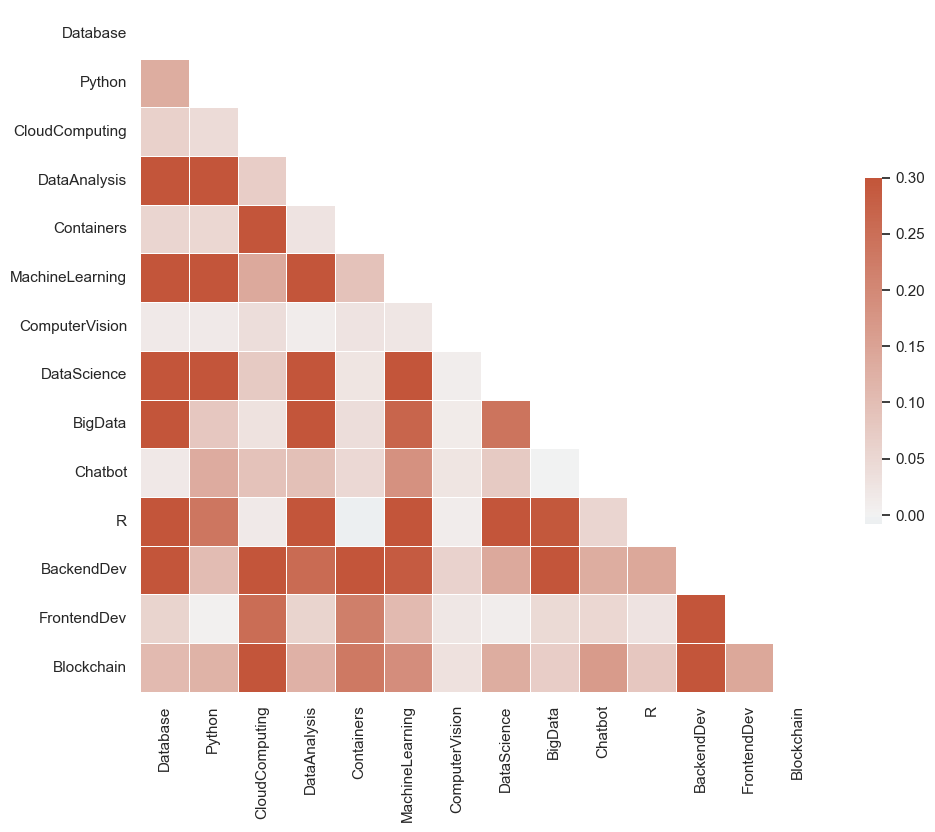

In [19]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = features.cov()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.show()

 FindING the optimized `n_components` for PCA_


In [20]:
accumulated_variance_ratios = []
n_components = list(range(1, 14))
for n in n_components:   
    pca_model = PCA(n_components=n, random_state=rs).fit(features)
    accumulated_variance_ratios.append(pca_model.explained_variance_ratio_.sum())
        

In [21]:
accumulated_variance_ratios

[0.2875684338770078,
 0.4630925644687348,
 0.5761339643675507,
 0.6487465627832245,
 0.7194878762997297,
 0.7882103410314051,
 0.8429558465572772,
 0.8944445500368855,
 0.9272695591307688,
 0.9544658170614803,
 0.9733572103164725,
 0.9870310843021111,
 0.9979163166617696]

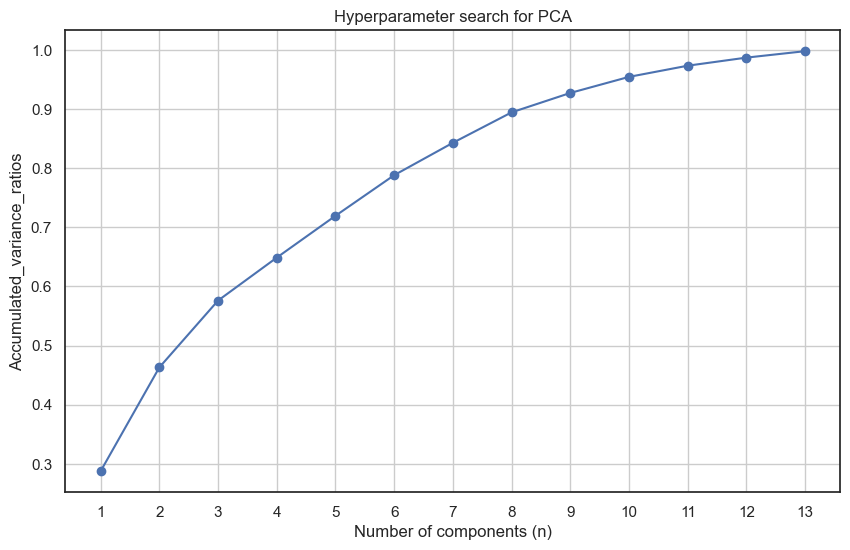

In [22]:
# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(n_components, accumulated_variance_ratios, marker='o')
plt.xlabel('Number of components (n)')
plt.ylabel('Accumulated_variance_ratios')
plt.title('Hyperparameter search for PCA')
plt.xticks(n_components)
plt.grid(True)
plt.show()

In [23]:
pca_model = PCA(n_components=9, random_state=rs).fit(features)
components = pca_model.transform(features)

In [24]:
components_df = pd.DataFrame(data=components)
transformed_df = pd.merge(user_ids, components_df, left_index=True, right_index=True)

### Performing k-means clustering on the PCA transformed feature vectors


In [25]:
transformed_features =transformed_df.loc[:, transformed_df.columns != 'user']
model = KMeans(n_clusters=14, random_state=rs).fit(transformed_features)
cluster_labels = model.labels_

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
cluster_df = combine_cluster_labels(user_ids, cluster_labels)
cluster_df.head()

,user,cluster
0,2,3
1,4,3
2,5,3
3,7,2
4,8,2


### Generating course recommendations based on the popular courses in the same cluster


In [27]:
test_user_url = "data/ratings.csv"

# Reading the test user data CSV file into a pandas DataFrame
# Selecting only the 'user' and 'item' columns using indexing
test_users_df = pd.read_csv(test_user_url)[['user', 'item']]

# Displaying the first few rows of the DataFrame to inspect its contents
test_users_df.head()

,user,item
0,1889878,CC0101EN
1,1342067,CL0101EN
2,1990814,ML0120ENv3
3,380098,BD0211EN
4,779563,DS0101EN


In [28]:
test_users_labelled = pd.merge(test_users_df, cluster_df, left_on='user', right_on='user')

In [29]:
test_users_labelled.to_csv('clusters_labelled.csv')

In [30]:
# Extracting the 'item' and 'cluster' columns from the test_users_labelled DataFrame
courses_cluster = test_users_labelled[['item', 'cluster']]

# Adding a new column 'count' with a value of 1 for each row in the courses_cluster DataFrame
courses_cluster['count'] = [1] * len(courses_cluster)

# Grouping the DataFrame by 'cluster' and 'item', aggregating the 'count' column with the sum function,
# and resetting the index to make the result more readable
courses_cluster_grouped = courses_cluster.groupby(['cluster','item']).agg(enrollments=('count','sum')).reset_index()

In [31]:
courses_cluster_grouped.head()

,cluster,item,enrollments
0,0,AI0111EN,15
1,0,BC0101EN,1001
2,0,BC0201EN,271
3,0,BC0202EN,33
4,0,BD0101EN,925


In [32]:
rec = {}
for user in user_ids['user'].tolist():
    user_subset = test_users_labelled[test_users_labelled['user'] == user]
    enrolled_courses = set(user_subset['item'].tolist())
    cluster_label = user_subset['cluster'].iloc[0]
    all_courses_in_cluster = set(test_users_labelled[test_users_labelled['cluster'] == cluster_label]['item'].tolist())
    new_courses = all_courses_in_cluster.difference(enrolled_courses)
    if new_courses:
        rec[user] = new_courses

In [33]:
list(rec[2])[:10]

['DB0113EN',
 'CO0201EN',
 'CC0101EN',
 'ST0301EN',
 'CC0271EN',
 'SW0101EN',
 'DAI101EN',
 'BD0115EN',
 'ML0201EN',
 'EE0101EN']

In [34]:
courses_cluster[courses_cluster['item'].isin(new_courses)]

,item,cluster,count
0,CC0101EN,5,1
1,CL0101EN,9,1
2,ML0120ENv3,3,1
3,BD0211EN,3,1
4,DS0101EN,8,1
...,...,...,...
233301,DS0101EN,9,1
233302,PY0101EN,8,1
233303,CB0105ENv1,0,1
233304,BD0141EN,13,1


In [35]:
# Dictionary to store recommendations
rec = {}
recommended_courses = []

# Loop through each user
for user in user_ids['user'].tolist():
    user_subset = test_users_labelled[test_users_labelled['user'] == user]
    enrolled_courses = set(user_subset['item'].tolist())
    cluster_label = user_subset['cluster'].iloc[0]
    all_courses_in_cluster = set(test_users_labelled[test_users_labelled['cluster'] == cluster_label]['item'].tolist())
    new_courses = all_courses_in_cluster.difference(enrolled_courses)
    
    if new_courses:
        rec[user] = new_courses
        recommended_courses.extend(new_courses)

# Calculate the average number of new/unseen courses recommended to each user
average_new_courses_per_user = sum(len(courses) for courses in rec.values()) / len(user_ids)


In [36]:
len(user_ids)

33901

In [37]:
from collections import Counter
# Identify the most frequently recommended courses
course_counts = Counter(recommended_courses)
top_10_courses = course_counts.most_common(10)

# Print the results
print(f"Average number of new/unseen courses recommended to each user: {average_new_courses_per_user}")
print("Top-10 commonly recommended courses:")
 

Average number of new/unseen courses recommended to each user: 97.49423320845993
Top-10 commonly recommended courses:


In [40]:
course_url = "data/course_processed.csv"
course_df = pd.read_csv(course_url)
top_10_courses_df = pd.DataFrame(top_10_courses, columns=['COURSE_ID', 'COUNT'])

# Merge the top 10 courses with their titles
top_10_courses_with_titles = pd.merge(top_10_courses_df, course_df, on='COURSE_ID')

top_10_courses_with_titles[['COUNT', 'TITLE']]


,COUNT,TITLE
0,33728,accelerating deep learning with gpus
1,33659,apply end to end security to a cloud application
2,33596,deep learning with tensorflow
3,33579,build swift mobile apps with watson ai services
4,33569,how to build watson ai and swift apis and make...
5,33550,serverless computing using cloud functions d...
6,33534,getting started with the data apache spark ma...
7,33518,data journalism first steps skills and tools
8,33498,game playing ai with swift for tensorflow s4tf
9,33495,end to end data science on cloudpak for data
